### `Putting it all together: Building a value-weighted index`
#### `01:Explore and clean company listing information`
To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported pandas as pd, and loaded the listings data set with listings information from the NYSE, NASDAQ, and AMEX. The column 'Market Capitalization' is already measured in USD mn.


- Inspect `listings` using `.info()`.
- Move the column `'Stock Symbol'` into the index (`inplace`).
- Drop all companies with missing `'Sector'` information from `listings`.
- Select companies with IPO Year before 2019.
- Inspect the result of the changes you just made using `.info()`.
- Show the number of companies per `'Sector'` using `.groupby()` and `.size()`. Sort the output in descending order.

In [1]:
import pandas as pd

In [2]:
listings = pd.read_excel('datasets/listings_agg.xlsx',  sheet_name=0, index_col=0)
listings

,Exchange,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,amex,XXII,"22nd Century Group, Inc",1.33,120.628,NaN,Consumer Non-Durables,Farming/Seeds/Milling
1,amex,FAX,Aberdeen Asia-Pacific Income Fund Inc,5.00,1266.333,1986.0,NaN,NaN
2,amex,IAF,Aberdeen Australia Equity Fund Inc,6.15,139.865,NaN,NaN,NaN
3,amex,CH,"Aberdeen Chile Fund, Inc.",7.22,67.563,NaN,NaN,NaN
4,amex,ABE,Aberdeen Emerging Markets Smaller Company Oppo...,13.36,128.843,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
66,69 nyse,ZB^H,Zions Bancorporation,25.30,0.000,NaN,NaN,NaN
66,70 nyse,ZBK,Zions Bancorporation,28.86,0.000,NaN,Finance,Major Banks
66,71 nyse,ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,332.556,2014.0,Consumer Services,Restaurants
66,72 nyse,ZTS,Zoetis Inc.,53.10,26105.443,2013.0,Health Care,Major Pharmaceuticals


In [3]:
# Inspect listings
print(listings.info())

# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)


# Select companies with IPO Year before 2019
listings = listings[listings["IPO Year"] < 2019]

# Inspect the new listings data
print(listings.info())

# Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 66
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               6674 non-null   object 
 1   Stock Symbol           6674 non-null   object 
 2   Company Name           6674 non-null   object 
 3   Last Sale              6590 non-null   float64
 4   Market Capitalization  6674 non-null   float64
 5   IPO Year               2852 non-null   float64
 6   Sector                 5182 non-null   object 
 7   Industry               5182 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               2349 non-null   object 
 1   Company Name           2349 non-null   object 
 2   La

In [4]:
listings.groupby('Sector').size().sort_values(ascending=False)

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Public Utilities         104
Basic Industries         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64

#### `02: Select and inspect index components`

Now that you have imported and cleaned the listings data, you can proceed to select the index components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.


We have already imported `pandas` as `pd`, and loaded the `listings` data with the modifications you made during the last exercise.

- Use `.groupby()` and `.nlargest()` to select the largest company by `'Market Capitalization'` for each `'Sector'`, and assign the result to `components`.
- Print `components`, sorted in descending order by market cap.
- Select `Stock Symbol` from the `index` of `components`, assign it to `tickers` and print the result.
- Create a list `info_cols` that holds the column names `Company Name`, `Market Capitalization`, and `Last Sale`. Next, use `.loc[]` with `tickers` and `info_cols` to `print()` more details about the listings sorted in descending order by `Market Capitalization`)

In [5]:
listings = pd.read_csv('datasets/listings_1.csv',index_col=0)
listings

,Exchange,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,,
ACU,amex,Acme United Corporation.,27.39,91.14,1988,Capital Goods,Industrial Machinery/Components
ROX,amex,"Castle Brands, Inc.",1.46,237.64,2006,Consumer Non-Durables,Beverages (Production/Distribution)
CQP,amex,"Cheniere Energy Partners, LP",32.70,11046.92,2007,Public Utilities,Oil/Gas Transmission
CIX,amex,CompX International Inc.,14.35,178.21,1998,Capital Goods,Industrial Machinery/Components
GSAT,amex,"Globalstar, Inc.",1.73,1931.55,2006,Consumer Services,Telecommunications Equipment
...,...,...,...,...,...,...,...
WNS,nyse,WNS (Holdings) Limited,28.95,1445.92,2006,Miscellaneous,Business Services
XRM,nyse,"Xerium Technologies, Inc.",6.34,102.41,2005,Basic Industries,Textiles
XIN,nyse,Xinyuan Real Estate Co Ltd,4.28,281.25,2007,Basic Industries,Homebuilding


In [6]:
# Select largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

Sector                 Stock Symbol
Technology             AAPL            740024.47
Consumer Services      AMZN            422138.53
Miscellaneous          MA              123330.09
Health Care            AMGN            118927.21
Transportation         UPS              90180.89
Finance                GS               88840.59
Basic Industries       RIO              70431.48
Public Utilities       TEF              54609.81
Consumer Non-Durables  EL               31122.51
Capital Goods          ILMN             25409.38
Energy                 PAA              22223.00
Consumer Durables      CPRT             13620.92
Name: Market Capitalization, dtype: float64
Index(['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')
                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  

#### `03: Import index component price information`
Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you. We have also made the variable `tickers` available to you, which contains the `Stock Symbol` for each index component as a `list`.

- Print `tickers` to verify the content matches your result from the last exercise.
  
- Use `pd.read_csv()` to import `'stock_prices.csv'`, parsing the `'Date'` column and also setting the `'Date'` column as index before assigning the -
  
- result to `stock_prices`. Inspect the result using `.info()`.

- Calculate the price return for the index components by dividing the last row of `stock_prices` by the first, subtracting 1 and multiplying by 100. Assign the result to `price_return`.

- Plot a horizontal bar chart of the sorted returns with the title `Stock Price Returns`.

['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB
None


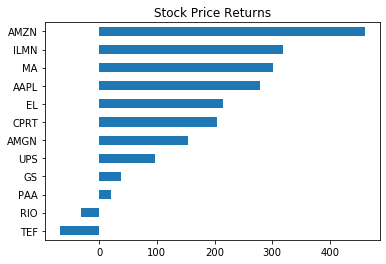

In [7]:
import matplotlib.pyplot as plt 
tickers = ['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']

# Print tickers
print(tickers)

# Import prices and inspect result
stock_prices = pd.read_csv('datasets/stock_prices.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

# Calculate the returns
price_return = stock_prices.iloc[-1].div(stock_prices.iloc[0]).sub(1).mul(100)

# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh', title='Stock Price Returns')
plt.title('Stock Price Returns')
plt.show()



#### `04: Calculate number of shares outstanding`
The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

We have already imported `pandas` as `pd`, `tickers` and `listings` as in the previous exercises.

- Inspect `listings` and print `tickers`.
- Use `.loc[]` with the list of `tickers` to select the index components and the columns `'Market Capitalization'` and `'Last Sale'`; assign this to `components`.
- Print the first five rows of components.
- Create `no_shares` by dividing `Market Capitalization` by `'Last Sale'`.
- Print `no_shares` in descending order.

In [8]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers,['Market Capitalization','Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, ACU to YPF
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               1015 non-null   object 
 1   Company Name           1015 non-null   object 
 2   Last Sale              1015 non-null   float64
 3   Market Capitalization  1015 non-null   float64
 4   IPO Year               1015 non-null   int64  
 5   Sector                 1015 non-null   object 
 6   Industry               1015 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 103.4+ KB
None
['RIO', 'ILMN', 'CPRT', 'EL', 'AMZN', 'PAA', 'GS', 'AMGN', 'MA', 'TEF', 'AAPL', 'UPS']
              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                        70431.48      38.94
ILMN                       25409.38     173.68
CPRT                       13620.92      29.65
EL                         31122.51    

#### `05: Create time series of market value`
You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.


We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you. We have also created the variables `components` and `stock_prices` that you worked with in the last exercises.

- Select the `'Number of Shares'` from `components`, assign to `no_shares`, and print the result, sorted in the default (ascending) order.
- Multiply `stock_prices` by no_shares to create a time series of market cap per ticker, and assign it to market_cap.
- Select the first and the last row of `market_cap` and assign these to `first_value` and `last_value`.
- Use `pd.concat()` to concatenate `first_value` and `last_value` along `axis=1` and plot the result as horizontal bar chart.

Stock Symbol
ILMN     146.300
EL       366.406
GS       397.817
CPRT     459.390
AMZN     477.171
PAA      723.405
AMGN     735.890
UPS      869.297
MA      1108.884
RIO     1808.718
TEF     5037.805
AAPL    5246.540
Name: Number of Shares, dtype: float64


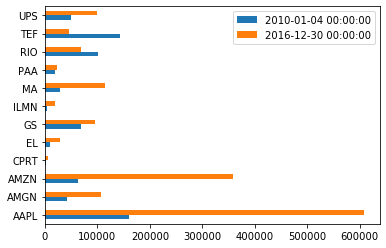

In [12]:
# Select the number of shares
components['Number of Shares'] = [1808.718, 146.300, 459.390, 366.406, 477.171, 723.405, 397.817, 735.890,  1108.884, 5037.805, 5246.540, 869.297]

no_shares = components['Number of Shares']
print(no_shares.sort_values(ascending=True))

# Create the series of market cap per ticker
market_cap = stock_prices * no_shares

# Select first and last market cap here
first_value = market_cap.iloc[0,:]
last_value = market_cap.iloc[-1]


# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()



Calculate & plot the composite index
By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt` for you. We have also loaded `components` and `market_cap_series`, which you worked with in the last exercise.

- Aggregate the market cap per trading day by applying `.sum()` to `market_cap_series` with `axis=1`, assign to `raw_index` and `print` the result.
- Normalize the aggregate market cap by dividing by the first value of `raw_index` and multiplying by 100. Assign this to `index` and `print` the result.
- Plot the index with the title `'Market-Cap Weighted Index'`.

In [14]:
market_cap_series = market_cap 
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946856e+05
2010-01-07    6.912416e+05
2010-01-08    6.958475e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574862e+06
Length: 1762, dtype: float64


In [16]:
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# calculate row-wise sum of values
row_sums = df.sum(axis=1)

# print the row sums
print(row_sums)

0    12
1    15
2    18
dtype: int64


Date
2010-01-04    6.948176e+05
2010-01-05    6.979957e+05
2010-01-06    6.946856e+05
2010-01-07    6.912416e+05
2010-01-08    6.958475e+05
                  ...     
2016-12-23    1.588874e+06
2016-12-27    1.599280e+06
2016-12-28    1.593635e+06
2016-12-29    1.589422e+06
2016-12-30    1.574862e+06
Length: 1762, dtype: float64
Date
2010-01-04    100.000000
2010-01-05    100.457394
2010-01-06     99.981005
2010-01-07     99.485328
2010-01-08    100.148231
                 ...    
2016-12-23    228.675035
2016-12-27    230.172703
2016-12-28    229.360257
2016-12-29    228.753855
2016-12-30    226.658300
Length: 1762, dtype: float64


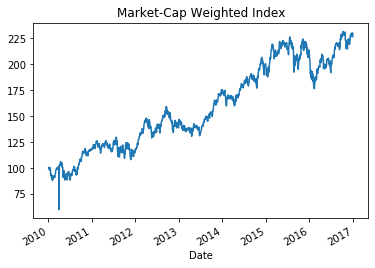

In [23]:
# Aggregate and print the market cap per trading day
raw_index = market_cap_series.sum(axis=1)
print(raw_index)

# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0]).mul(100)
print(index)

# Plot the index here
index.plot(title='Market-Cap Weighted Index')
plt.show()


#### `06: Calculate the contribution of each stock to the index`
You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.
We have already imported pandas as pd and matplotlib.pyplot as plt for you. We have also loaded components and the index you worked with in the last exercise.

- Divide the last `index` value by the first, subtract 1 and multiply by 100. Assign the result to `index_return` and print it.
- Select the `'Market Capitalization'` column from `components`.
- Calculate the total market cap for all components and assign this to `total_market_cap`.
- Divide the components' market cap by `total_market_cap` to calculate the component weights, assign it to `weights`, and print `weights` with the values sorted in default (ascending) order.
- Multiply `weights` by the `index_return` to calculate the contribution by component, sort the values in ascending order, and plot the result as a horizontal bar chart.

126.65829980562356
Stock Symbol
CPRT    0.007564
PAA     0.012340
ILMN    0.014110
EL      0.017282
TEF     0.030324
RIO     0.039110
GS      0.049332
UPS     0.050077
AMGN    0.066039
MA      0.068484
AMZN    0.234410
AAPL    0.410929
Name: Market Capitalization, dtype: float64


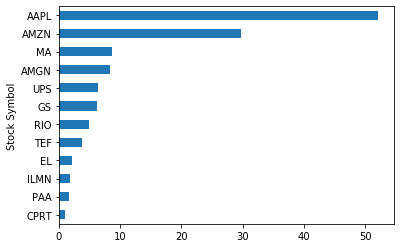

In [26]:
# Calculate and print the index return here
index_return = (index.iloc[-1] / index.iloc[0] - 1) * 100
print(index_return)

# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum()

# Calculate the component weights, and print the result
weights = market_cap / total_market_cap
print(weights.sort_values(ascending=True))

# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()

#### `07: Compare index performance against benchmark` I
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we used the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

We have already imported `pandas` as `pd`, `matplotlib.pyplot` as `plt` for you. We have also loaded your `index` and the `DJIA` data into variables index and djia, respectively, both as a `pd.Series()`.

- Convert `index` to a `pd.DataFrame` with the column name `'Index'` and assign the result to `data`.
- Normalize `djia` to start at 100 and add it as new column to `data`.
- Show the total return for both `index` and `djia` by dividing the last row of `data` by the first, subtracting 1 and multiplying by 100.
- Show a plot of both of the series in `data`.

In [41]:
djia = pd.read_csv('datasets/djia2.csv',index_col=0)
djia = djia['DJIA']
data = pd.DataFrame({'Index':index})


Index    126.658300
DJIA      86.722172
dtype: float64


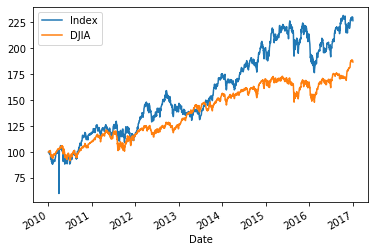

In [42]:
# Convert index series to dataframe here
data = pd.DataFrame({'Index':index})


# Normalize djia series and add as new column to data
djia = djia.div(djia[0]).mul(100)
data['DJIA'] = djia

# Show total return for both index and djia
print((data.iloc[-1] / data.iloc[0] -1 ) * 100)

# Plot both series
data.plot()
plt.show()

#### `08: Compare index performance against benchmark II`
The next step in analyzing the performance of your index is to compare it against a benchmark.

In the video, we have use the S&P 500 as benchmark. You can also use the Dow Jones Industrial Average, which contains the 30 largest stocks, and would also be a reasonable benchmark for the largest stocks from all sectors across the three exchanges.

We have already imported `numpy` as `np`, `pandas` as `pd`, `matplotlib.pyplot` as `plt` for you. We have also loaded your Index and the Dow Jones Industrial Average (normalized) in a variable called `data`.

- Inspect `data` and print the first five rows.
- Define a function `multi_period_return` that takes a `numpy` `array` of period returns as input, and returns the total return for the period. Use the formula from the video - add 1 to the input, pass the result to `np.prod()`, subtract 1 and multiply by 100.
- Create a `.rolling()` window of length `'360D'` from `data`, and apply `multi_period_return`. Assign to `rolling_return_360`.
- Plot `rolling_return_360` using the `title` `'Rolling 360D Return'`.

In [44]:
data

,Index,DJIA
Date,,
2010-01-04,100.000000,100.000000
2010-01-05,100.457394,99.887188
2010-01-06,99.981005,99.902872
2010-01-07,99.485328,100.216365
2010-01-08,100.148231,100.323414
...,...,...
2016-12-23,228.675035,188.339809
2016-12-27,230.172703,188.445912
2016-12-28,229.360257,187.393754


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   1762 non-null   float64
 1   DJIA    1762 non-null   float64
dtypes: float64(2)
memory usage: 121.3 KB
None
                 Index        DJIA
Date                              
2010-01-04  100.000000  100.000000
2010-01-05  100.457394   99.887188
2010-01-06   99.981005   99.902872
2010-01-07   99.485328  100.216365
2010-01-08  100.148231  100.323414


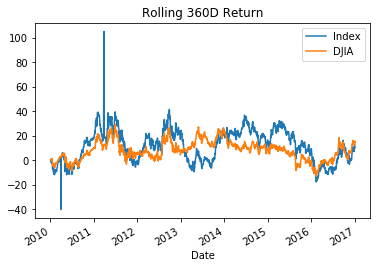

In [45]:
import numpy as np 
# Inspect data
print(data.info())
print(data.head())

# Create multi_period_return function here
def multi_period_return(r):
    return (np.prod(r + 1) - 1 ) * 100

# Calculate rolling_return_360
rolling_return_360 = data.pct_change().rolling('360D').apply(multi_period_return)

# Plot rolling_return_360 here
rolling_return_360.plot(title='Rolling 360D Return')
plt.show()



#### `09: Compare index performance against benchmark II`

To better understand the characteristics of your index constituents, you can calculate the return correlations.
Use the daily stock prices or your index companies, and show a heatmap of the daily return correlations!

We have already imported `pandas` as `pd`, `matplotlib.pyplot` as `plt`, and `seaborn` as `sns`. We have also loaded the historical price series of your index constituents into the variable `stock_prices`.

- Inspect `stock_prices` using `.info()`.
- Calculate the daily returns for `stock_prices` and assign the result to `returns`.
- Calculate the pairwise correlations for `returns`, assign them to `correlations` and print the result.
- Plot a `seaborn` annotated heatmap of the daily return correlations with the title `'Daily Return Correlations'`.

In [47]:
import seaborn as sns
stock_prices

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,116.52,147.55,760.59,13.89,78.38,240.97,128.75,104.71,33.41,38.12,9.17,115.97
2016-12-27,117.26,148.36,771.40,14.00,78.23,241.56,128.94,104.80,33.49,38.35,9.13,116.13
2016-12-28,116.76,147.67,772.13,13.89,77.22,240.65,127.93,103.68,33.05,38.87,9.03,115.20


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 259.0 KB
None
          AAPL      AMGN      AMZN      CPRT        EL        GS      ILMN  \
AAPL  1.000000  0.286898  0.327611  0.346616  0.306770  0.344981  0.264791   
AMGN  0.286898  1.000000  0.323408  0.355892  0.349893  0.390076  0.336927   
AMZN  0.327611  0.323408  1.000000  0.298929  0.334031  0.333402  0.242726 

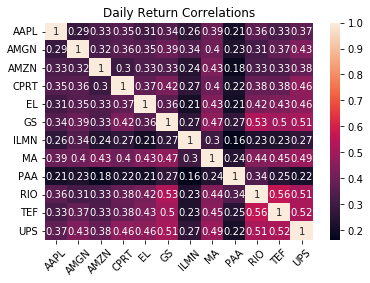

In [48]:
# Inspect stock_prices here
print(stock_prices.info())

# Calculate the daily returns
returns = stock_prices.pct_change()

# Calculate and print the pairwise correlations
correlations = returns.corr()
print(correlations)

# Plot a heatmap of daily return correlations
sns.heatmap(correlations, annot=True) 
plt.xticks(rotation=45) 
plt.title('Daily Return Correlations') 
plt.show()

